---

# **title: '머신러닝4 확률적 경사 하강법'**

# **date: '2022-07-04 09:00'**

---

## 확률적 경사 하강법
- 점진적 학습 (step, 보폭)
- 학습률
- XGBoost, Light GBM, 딥러닝(이미지 분류, 자연어처리, 옵티마이져)


### 샘플
 - 신경망 이미지 데이터, 자연어
 - 자율주행 하루 데이터 1TB -->학습량이 너무 큼
 - 한꺼번에 모델을 학습하기 어려움
  + 샘플링, 배치, 에포크, 오차(=손실=loss)가 가장 작은 지점을 찾아야 함.
 - 이러한 방법이 확률적 경사 하강법 
 - 빠른 시간내에 손실을 줄일 수 있는 방법을 찾는것= 손실함수를 이용.
  + 10시간 걸려 정확도95% 1시간 걸려 정확도 80% 어느 것이 좋은가? 최적화.

### 손실함수
- 로지스틱 손실 함수

In [ ]:
import pandas as pd
fish = pd.read_csv("http://bit.ly/fish_csv_data")
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
fish_input =fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target =fish['Species'].to_numpy()

fish_input.shape,fish_target.shape

((159, 5), (159,))

- 훈련세트와 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target =train_test_split(
    fish_input, fish_target, random_state =42
)

- 훈련세트와 테스트 세트의 특성 표준화
  + 무게, 길이, 대각선 길이, 높이, 너비
-표준화 처리진행

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

## 모델링
- 확률적 경사 하강법

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log',max_iter =10, random_state =42)#에포크 10회는 좀 적으니 더 숫자를 넣어라~

sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


- partial_fit()메서드 사용하면 추가학습 가능

In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합
- 에포크 숫자가 적으면 덜학습 됨
- early_stopping
 + 에포크 숫자를 1000회로 주어졌을 때 손실 10,9,8.....3,3,3
 + 3에 도달한 시점에서 학습을 몇번하고 그만 둠

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score =[]
test_score= []
classes = np.unique(train_target)

#300번 에포크 훈련을 반복
#훈련할 때마다, train_score, test_score추가를 한다.
for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target, classes= classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

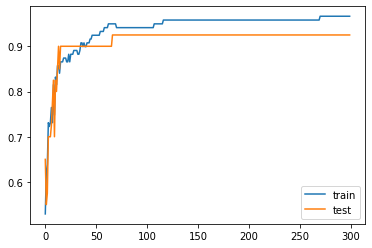

In [ ]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()
ax.plot(train_score)
ax.plot(test_score)
ax.legend(["train", "test"])
plt.show()

## XGBoost, LightGBM코드
 - train-loss, train-accuaray,test-loss,test-accurary